# Part 7 of Axis Scaling: Combining Scales

This page is primarily based on the following page at the Circos documentation site:



- [7. Combining Scales](????????????)



That page is found as part number 4 of the ??? part ['Axis Scaling' section](http://circos.ca/documentation/tutorials/quick_start/) of [the larger set of Circos tutorials](http://circos.ca/documentation/tutorials/).



Go back to Part 6 by clicking [here &#8592;](AxisScaling_Part6.ipynb).



----



7 --- Axis Scaling
==================

7. Combining Scales
-------------------

::: {#menu4}
[[Lesson](/documentation/tutorials/scaling/combining_scales/lesson){.clean}]{.active}
[Images](/documentation/tutorials/scaling/combining_scales/images){.normal}
[Configuration](/documentation/tutorials/scaling/combining_scales/configuration){.normal}
:::

In this final example, I combine all the scale adjustments discussed in
this tutorial section into one image. I\'ve added a histogram plot, in
addition to the heat map, that shows the scale across the ideograms. The
histogram y-axis is graduated every 0.5 from 0x to 10x. The y-axis
labels were added in post-processing (Circos does not know how to do
this - yet).

Chromosomes 1, 2 and 3 are displayed, with chromosome 2 split into three
ideograms. Two ranges on chromosome 2 are defined 0-100 and 150-), as
well as an axis break 40-60Mb. Chromosomes 1 and 3 have a baseline scale
of 1x and chromosome 2 has a baseline scale of 2x (first two ideograms)
and 0.5x (third ideogram).

Notice how the three ideograms on chromosome two are defined. First,
Circos is told to draw two regions 0-100 (ideogram id \"a\") and 150-)
(ideogram id \"b\"). Scale factors of 2x and 0.5x are then assigned to
these ideograms. Finally, an axis break is introduced at 40-60Mb, which
breaks the \"a\" ideogram into two. However, the global scale is still
2x across the two new pieces, which are still internally labeled as
\"a\", and therefore the ideogram label is 2a for both pieces.

At the moment, you cannot define a different global scale for ideograms
that contain an axis break. If you needed the same regions drawn, each
with a different global scale, you would define them as follows, for
example

```ini
chromosomes: hs2[a]:0-40;hs2[b]:60-100;hs2[c]:150-)
chromosomes_scale: a:2;b:3;c:0.5
```


There are several local scale adjustments in this example. On chromosome
1, there are two zoom regions that are smoothed and their smoothing
regions overlap. Recall the rule that for a given region the scale
factor is taken to be the largest absolute zoom level for any zoom
region that overlaps with it. As the smoothing of the 10x and 0.2x
regions run into each other, the is a sudden scale shift (marked by red
arrot in the vicinity of chr1:140Mb). Currently, scale smoothing is not
iterative - there is no additional smoothing applied between adjacent
smoothing regions.

On chromosome 2 there is a 5x zoom region at the start of the first
ideogram. Its smoothing region runs off the edge of the ideogram.

On chromosome 3 there are two nested zoom regions. The outer region is
0.5x 25-150Mb and the inner region is 10x 72-73Mb. Both are smoothed,
but their smoothing does not overlap.

Currently, a region is smoothed by gradually adjusting its scale from
that defined in the configuration file to the ideogram\'s base scale. In
the last case, where one region (10x) was nested inside another (0.5x),
the inner region is still smoothed between 10x and 1x, the latter being
the ideograms\' base scale. Keep this in mind when nesting regions.

Finally, a word about tick marks and scale adjustment. Experiment with
the tick mark parameters `label_separation`, `tick_separation` and
`min_label_distance_to_edge`. If you are going to be significantly
expand the scale in some regions, define tick marks with sufficiently
small spacing to cover the expanded region in ticks. Set the
tick\_separation to avoid tick mark crowding in regions with a lower
scale.

If you are going to change scale, make sure that this fact is made clear
in your figure. You can mark this fact by using highlights or a heatmap.
Circos will produce a report of zoom regions as it\'s drawing the image,
and you can use this output to create data files to annotate the figure
(you need to run Circos twice --- once to generate the file and again to
plot it).

```ini
...
zoomregion ideogram 1 chr hs2  17000001  18000001 scale  2.82 absolutescale  2.82
zoomregion ideogram 1 chr hs2  18000001  19000001 scale  2.55 absolutescale  2.55
zoomregion ideogram 1 chr hs2  19000001  20000001 scale  2.27 absolutescale  2.27
zoomregion ideogram 1 chr hs2  20000001  40000000 scale  2.00 absolutescale  2.00
zoomregion ideogram 2 chr hs2  59999999  60000001 scale  1.83 absolutescale  1.83
zoomregion ideogram 2 chr hs2  60000001  61000001 scale  1.75 absolutescale  1.75
zoomregion ideogram 2 chr hs2  61000001  62000001 scale  1.67 absolutescale  1.67
zoomregion ideogram 2 chr hs2  62000001  63000001 scale  1.58 absolutescale  1.58
zoomregion ideogram 2 chr hs2  63000001  64000001 scale  1.50 absolutescale  1.50
zoomregion ideogram 2 chr hs2  64000001  65000001 scale  1.42 absolutescale  1.42
zoomregion ideogram 2 chr hs2  65000001  66000001 scale  1.33 absolutescale  1.33
zoomregion ideogram 2 chr hs2  66000001  67000001 scale  1.25 absolutescale  1.25
...
```


The absolute scale is `max(scale,1/scale)`.




----

### Generating the plot produced by this example code


The following two cells will generate the plot. The first cell adjusts the current working directory.

In [1]:
%cd ../circos-tutorials-0.67/tutorials/7/7/

/home/jovyan/circos-tutorials-0.67/tutorials/7/7


In [2]:
%%bash
../../../../circos-0.69-6/bin/circos -conf circos.conf

debuggroup summary 0.38s welcome to circos v0.69-6 31 July 2017 on Perl 5.022000
debuggroup summary 0.38s current working directory /home/jovyan/circos-tutorials-0.67/tutorials/7/7
debuggroup summary 0.38s command ../../../../circos-0.69-6/bin/circos -conf circos.conf
debuggroup summary 0.38s loading configuration from file circos.conf
debuggroup summary 0.38s found conf file circos.conf
debuggroup summary 0.59s debug will appear for these features: output,summary
debuggroup summary 0.59s bitmap output image ./circos.png
debuggroup summary 0.59s SVG output image ./circos.svg
debuggroup summary 0.59s parsing karyotype and organizing ideograms
debuggroup summary 0.71s karyotype has 24 chromosomes of total size 3,095,677,436
debuggroup summary 0.71s applying global and local scaling
debuggroup summary 0.87s allocating image, colors and brushes
debuggroup summary 2.96s drawing 5 ideograms of total size 620,472,429
debuggroup summary 2.96s drawing highlights and ideograms
debuggroup summary

Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781, <F> line 260.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.


View the plot in this page using the following cell.

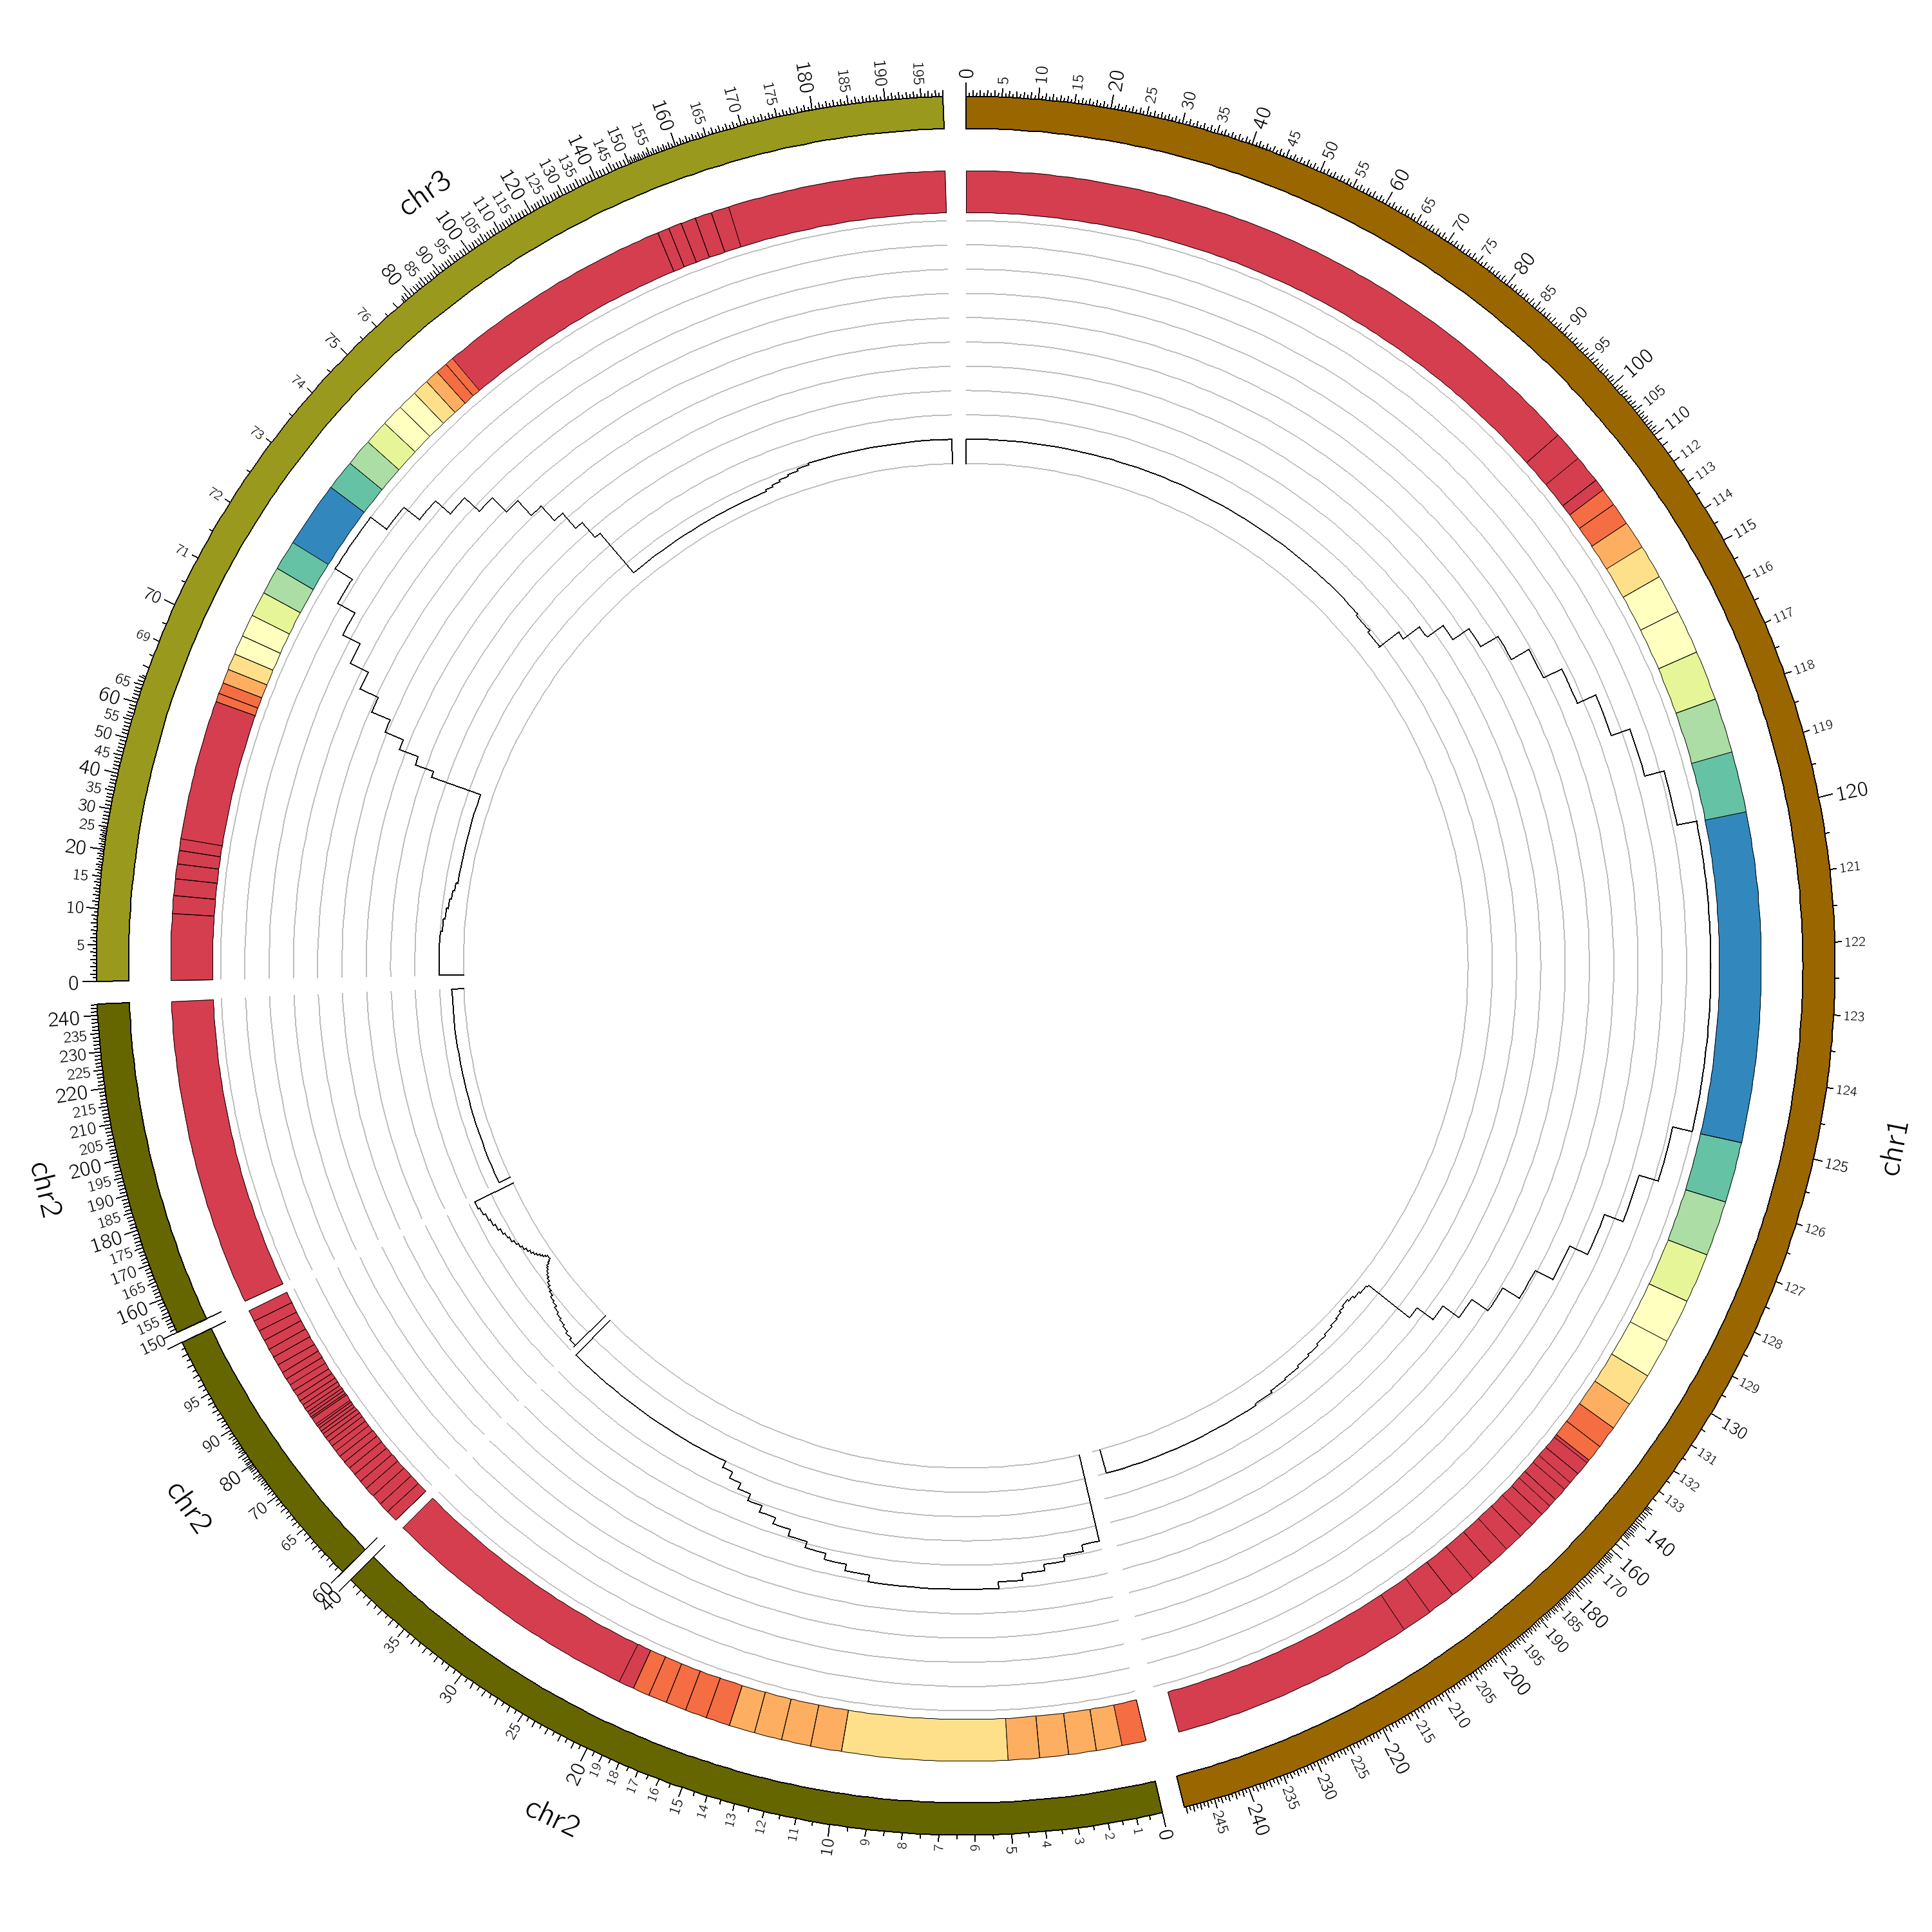

In [3]:
from IPython.display import Image
Image("circos.png")

----

Continue on to the next part of the Axis Scaling series by clicking [here &#10145;](AxisScaling_Part8.ipynb).

----